# Workshop: Analyzing bank marketing data with scikit-learn

Task: Your client has given you a dataset and has asked you to build a model to:
1. predict whether a given customer is likely to purchase a bank term deposit.
2. analyze the factors that make customer more likely (or less likely) to purchase a bank term deposit

Build this model by going through the process of tackling classification problems:
1. Load and explore data
2. Preprocess / clean data
3. Train the model
4. Evaluate the model
5. Use the model (for prediction and interpretation)

Based on the dataset's [README](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing), we know that the data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y). For more info on the dataset, please see the dataset's [README](http://archive.ics.uci.edu/ml/datasets/Bank+Marketing).

In [1]:
# Load libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = 50
%precision 3

'%.3f'

## 1. Load and explore the data

In [2]:
# Load data
df = pd.read_csv('../data/bank-marketing-data/bank-additional-full.csv', sep=';')

### Data exploration

In [3]:
# see the top n rows by calling df.head(n)

# YOUR CODE HERE:
df.head(9)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# see summary statistics by calling df.describe()

# YOUR CODE HERE:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## 2. Clean and preprocess data

Because data cleaning and working with pandas warrants a workshop in itself, the following cells have done the clean up for you. There are plenty of pandas tutorials out there that you can follow to learn more about data cleaning

In [5]:
# removing rows with unknown values
for column in df.columns:
    if (df[column].dtype == object): 
        df = df[df[column] != 'unknown'] ## remove rows with unknown

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Convert string data to numerical data so that scikitlearn can understand it
cols_to_transform = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week',
                    'poutcome', 'y']
df_with_dummies = pd.get_dummies(df, columns = cols_to_transform)


In [7]:
# Remove the redundant 'y_no' column generated by .get_dummies()
df = df_with_dummies.drop('y_no', axis=1)

In [8]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,...,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


### Convert pandas dataframe into 2 matrices for the model's consumption

In [21]:
X = df.iloc[:, df.columns != 'y_yes'].values
y = df.iloc[:, df.columns == 'y_yes'].values.ravel()

In [16]:
# try printing the following commands to get a sense of what X and y actually are:
#  X.shape, y.shape
#  X[0], y[0]
#  X[any_random_integer], y[any_random_integer]
#  X, y

In [19]:
X[0], y[0]

(array([  5.600e+01,   2.610e+02,   1.000e+00,   9.990e+02,   0.000e+00,
          1.100e+00,   9.399e+01,  -3.640e+01,   4.857e+00,   5.191e+03,
          0.000e+00,   0.000e+00,   0.000e+00,   1.000e+00,   0.000e+00,
          0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
          0.000e+00,   0.000e+00,   1.000e+00,   0.000e+00,   1.000e+00,
          0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
          0.000e+00,   1.000e+00,   0.000e+00,   1.000e+00,   0.000e+00,
          1.000e+00,   0.000e+00,   0.000e+00,   1.000e+00,   0.000e+00,
          0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
          1.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
          1.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,   0.000e+00,
          1.000e+00,   0.000e+00]), array([0], dtype=uint8))

### Split data into train and test set

In [35]:
# Use sklearn's train_test_split method to split the data into train and test set

# YOUR CODE HERE:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


## 3. Train the model!

In [31]:
# import the LogisticRegression class from sklearn.linear_model

# YOUR CODE HERE:

from sklearn.linear_model import LogisticRegression

In [34]:
# train the model using the .fit(x_train, y_train) method

# YOUR CODE HERE:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 4. Evaluate the model

### Evaluation method 1: `.score(X, y)`

In [ ]:
# Evaluate your model's performance using the .score() method

# YOUR CODE HERE:
train_score = model.score(X_train, y_train)
train_model


In [ ]:
# 
print(df['y'].value_counts())
print("Accuracy of a model that predicts 'no' (i.e. 0) all the time: ", 36548.0/(36548 + 4640))

### Evaluation method 2: `.confusion_matrix(expected, predicted)`

In [36]:
from sklearn import metrics

In [37]:
# Evaluate model using .confusion_matrix(y_true, y_predicted)

# YOUR CODE HERE:

expected = y
predicted = model.predict(X)

confusion_matrix = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix")
print(confusion_matrix)

Confusion matrix
[[25829   800]
 [ 2254  1605]]


Confusion matrices are in the following format:
    
```
[[true_positive , false_positive]
 [false_negative, true_negative]]
```

### Evaluation method 3: `.classification_report(expected, predicted)`

In [38]:
# Evaluate model using .classification_report(y_true, y_predicted)

# YOUR CODE HERE:
report = metrics.classification_report(expected, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.92      0.97      0.94     26629
          1       0.67      0.42      0.51      3859

avg / total       0.89      0.90      0.89     30488



## Iteration 2: Train and evaluate the model again with a balanced dataset

In [39]:
df = pd.read_csv('../data/bank-marketing-data/bank-additional-one-hot-encoded.csv')
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [40]:
negatives = df[df['y'] == 0]
positives = df[df['y'] == 1]
negatives.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,...,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [41]:
number_of_samples = len(positives)
sliced_negatives = negatives.head(number_of_samples)

In [42]:
df = pd.concat([sliced_negatives, positives])

In [43]:
X = df.iloc[:, df.columns != 'y'].values
y = df.iloc[:, df.columns == 'y'].values.ravel()

In [44]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [47]:
# Train model 

# YOUR CODE HERE:

model_2 = LogisticRegression()
model_2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [48]:
# Evaluate model
expected_2 = y
predicted_2 = model_2.predict(X)
report = metrics.classification_report(expected_2, predicted_2)

print("CLASSIFICATION REPORT")
print(report)

CLASSIFICATION REPORT
             precision    recall  f1-score   support

          0       0.97      0.99      0.98      4640
          1       0.99      0.97      0.98      4640

avg / total       0.98      0.98      0.98      9280



## 5. Using the model to predict outcomes based on fresh/unseen data

Load new data from '../data/bank-marketing-data/bank-unseen-data.csv'

In [49]:
df_unseen = pd.read_csv('../data/bank-marketing-data/bank-unseen-data.csv')

In [50]:
# Explore data again with df.head(). Notice that there's no 'y' column at the end

# YOUR CODE HERE:


In [ ]:
# Convert our pandas dataframe to a matrix, so that the model can consume it
X_unseen = df_new.as_matrix()

In [ ]:
# Use your model to predict the y value (i.e. 0 or 1) of the new data (hint: model.predict()`)



In [ ]:
# Use your model to predict the probabilities of y being 0 or 1 (hint: model.predict_proba()`)


# Bonus: interpreting our model

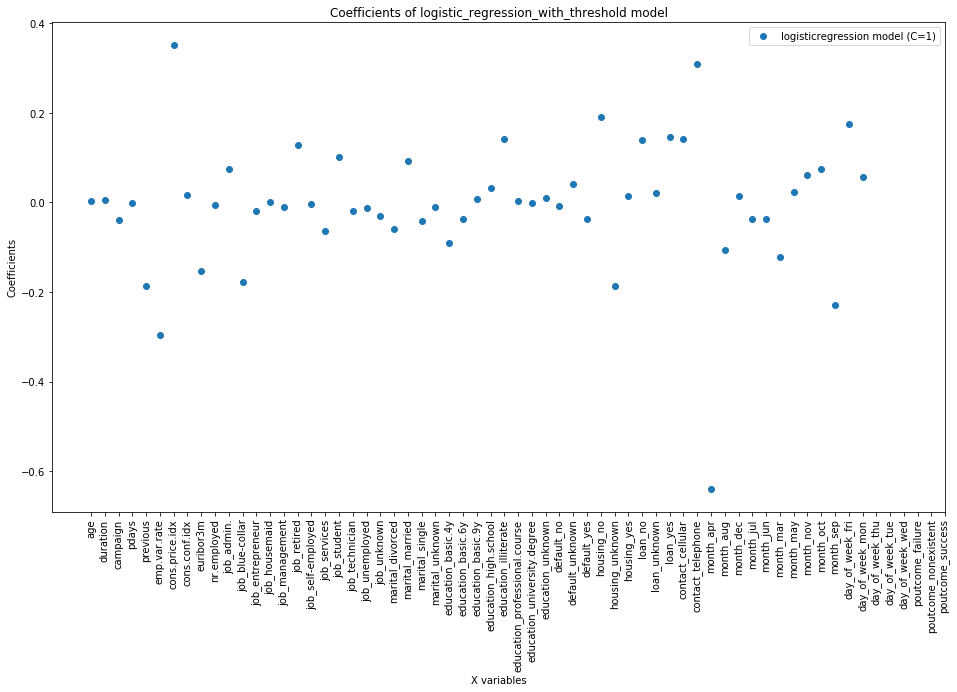

In [51]:
plt.figure(figsize=(16,9))

plt.plot(model.coef_.T, 'o', label="logisticregression model (C=1)")
plt.xticks(range(X.shape[1]), df.columns, rotation=90)
plt.title("Coefficients of logistic_regression_with_threshold model")
plt.ylabel("Coefficients")
plt.xlabel("X variables")
plt.legend()

# Note: if you get any errors here saying model is not defined, simply replace 'model' in the second line of this box with the name of your model variable

In [52]:
# Before we can interpret coefficients as probabilities, we need to do a little math to calculate the odds ratio
# and the probability
logodds = model.intercept_ + model.coef_[0] * 2
odds = np.exp(logodds)
probabilities = odds/(1 + odds)
probabilities

array([ 0.502,  0.503,  0.481,  0.5  ,  0.409,  0.357,  0.67 ,  0.51 ,
        0.425,  0.497,  0.538,  0.413,  0.491,  0.502,  0.496,  0.565,
        0.5  ,  0.469,  0.551,  0.492,  0.495,  0.485,  0.472,  0.547,
        0.48 ,  0.496,  0.456,  0.482,  0.504,  0.517,  0.571,  0.502,
        0.501,  0.506,  0.497,  0.521,  0.482,  0.595,  0.408,  0.508,
        0.57 ,  0.511,  0.574,  0.571,  0.651,  0.218,  0.447,  0.508,
        0.482,  0.482,  0.44 ,  0.513,  0.532,  0.538,  0.388,  0.587,
        0.529])

In [53]:
number_of_x_vars = len(df.columns) - 1

ValueError: incompatible sizes: argument 'height' must be length 63 or scalar

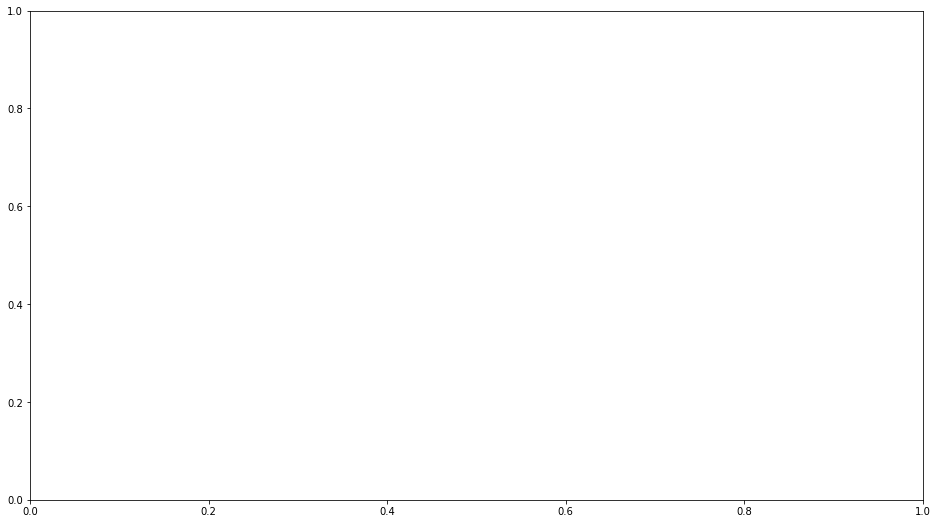

In [54]:
plt.figure(figsize=(16,9))

plt.bar(range(0, number_of_x_vars), probabilities)
plt.title("Probabilities of outcome where y=1 given a unit change in X")
plt.xlabel("X variables")
plt.ylabel("Probability")
plt.axhline(y=0.5, hold=None, alpha=0.5)
plt.xticks(range(X.shape[1]), df.columns, rotation=90)
plt.legend()

#### How to interpret the chart 

We can interpret the chart above as such: Given a unit increase in X, the user is predicted to be \__% more likely to purchase a bank term deposit (i.e. y=1)

For example, given a unit increase in employment variation rate (the first positive blip in the chart), the user is predicted to be 16% more likely to purchase a bank term deposit

#### Based on this chart, we can observe the following: 
    
Attributes that have a positive effect on the outcome:
- contact_cellular
- month_august
- month_oct
- day_of_week_fri

Attributes that have a negative effect on the outcome:
- emp.var.rate
- cons.price.index
- cons.conf.index
- euribor3m
- education_basic.4y
- contact_telephone
- month_may